##**Indranil Bain**
##**2020CSB039**
##**Assignment-2, Cancer Wisconsin (Diagnostic)**

**Installing Open Datasets**

In [ ]:
pip install opendatasets

 **Downloading dataset from kaggle ----**

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: indranilbain
Your Kaggle Key: ··········


100%|██████████| 48.6k/48.6k [00:00<00:00, 36.5MB/s]

In [ ]:
!pwd


/content/breast-cancer-wisconsin-data


In [ ]:
%cd breast-cancer-wisconsin-data

/content/breast-cancer-wisconsin-data/breast-cancer-wisconsin-data


In [ ]:
!pwd

/content/breast-cancer-wisconsin-data/breast-cancer-wisconsin-data


**(1) Implement Logistic regression using scikit-learn package in python after
splitting the dataset 80:10:10 percent (use seed = 5 for splitting).**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:
data = pd.read_csv('data.csv')
data = data.dropna(axis=1)

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)
joblib.dump(model, 'model_1.joblib')

['model_1.joblib']

1. Loaded data from 'data.csv' and drop columns with missing values.
2. Prepared features (X) and target variable (y).
3. Split data into training, validation, and test sets (80-10-10).
4. Created and train a logistic regression model.
5. Saved the trained model as 'model_1.joblib'.

**(2) Use ‘newton-cg’, ‘lbfgs’, ‘liblinear’ solver to train the Logistic regression
model, and create a table for the coefficients of all the features along with
accuracy.**

In [ ]:
from sklearn.metrics import accuracy_score
solvers = ['newton-cg', 'lbfgs', 'liblinear']
resultsCoefficients = []
resultsAccuracy = []

for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    resultsCoefficients.append(model.coef_[0])
    resultsAccuracy.append(accuracy)

resultsCoefficients_df = pd.DataFrame(resultsCoefficients)
resultsAccuracy_df = pd.DataFrame(resultsAccuracy)

print(resultsCoefficients_df)
print(resultsAccuracy_df)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


             0             1             2             3             4   \
0  7.993937e-10 -8.729785e-02  1.543279e-03 -2.359560e-01 -1.634156e-03   
1 -1.908497e-10 -3.918059e-16 -9.479980e-16 -2.236372e-15  1.419679e-14   
2 -3.309940e-10 -9.503721e-04 -1.746791e-03 -5.813435e-03 -7.486524e-03   

             5             6             7             8             9   ...  \
0  8.748458e-04  8.129519e-03  1.227283e-02  5.018226e-03  1.216872e-03  ...   
1 -5.921006e-18  1.573256e-20  7.355254e-18  3.918316e-18 -1.121517e-17  ...   
2 -1.013261e-05 -3.383430e-06  5.882654e-06  2.953515e-06 -1.912371e-05  ...   

             21            22            23            24            25  \
0 -9.465739e-02  8.077441e-02  4.056253e-02  2.166648e-02  2.013552e-03   
1 -2.607977e-16 -1.157780e-15 -1.362631e-15  3.834014e-14 -7.448697e-18   
2 -9.098914e-04 -2.218218e-03 -5.557891e-03  6.983807e-03 -1.319575e-05   

             26            27            28            29            30  
0  

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


1. Imported the necessary function ('accuracy_score ') and a list of
solvers.
2. Initialized empty lists to store coefficients and accuracy scores for
different solvers.
3. For each solver in the list:
- Created a logistic regression model with the specified solver.
-  Fitted the model on the training data.
-  Predicted the target variable for the test data.
- Calculated the accuracy score using accuracy_score.
- Stored the model coefficients and accuracy in their respective lists.
4. Created DataFrames from the lists of coefficients and accuracy.
5. Printed the DataFrame containing coefficients for each solver.
6. Printed the DataFrame containing accuracy scores for each solver.

**(3) Use '11', '12', 'none' penality to train the Logistic regression model, and
create a table for the coefficients of all the features along with accuracy.**

In [ ]:
penalty_types = ['l1', 'l2', 'none']
resultsCoefficient = []
resultsAccuracy = []

for penalty in penalty_types:
    model = LogisticRegression(penalty=penalty, solver = 'saga')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultsCoefficient.append(model.coef_[0])
    resultsAccuracy.append(accuracy)

resultsCoefficient_df = pd.DataFrame(resultsCoefficient)
resultsAccuracy_df = pd.DataFrame(resultsAccuracy)

print(resultsCoefficient_df)
print(resultsAccuracy_df)

             0             1             2             3             4   \
0 -1.908507e-10 -8.070995e-14 -1.967176e-13 -4.609907e-13  3.031116e-12   
1 -1.908507e-10 -8.064491e-14 -1.966741e-13 -4.590482e-13  3.048963e-12   
2 -1.908507e-10 -8.119522e-14 -1.975674e-13 -4.627028e-13  3.026400e-12   

             5             6             7             8             9   ...  \
0 -9.920320e-16  0.000000e+00  1.307015e-15  5.842814e-16 -2.095745e-15  ...   
1 -1.232603e-15  1.402813e-17  1.553799e-15  8.269773e-16 -2.335229e-15  ...   
2 -1.236010e-15  7.705427e-18  1.544801e-15  8.241026e-16 -2.342353e-15  ...   

             21            22            23            24            25  \
0 -5.302535e-14 -2.400974e-13 -2.764720e-13  8.116597e-12 -1.309080e-15   
1 -5.293336e-14 -2.401224e-13 -2.740921e-13  8.135580e-12 -1.548653e-15   
2 -5.364227e-14 -2.411693e-13 -2.788066e-13  8.097394e-12 -1.553571e-15   

             26            27            28            29            30  
0  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1. Initialized a list of penalty types (*11', '12', "none").
2. Created empty lists to store coefficients and accuracy scores for
different penalty types.
3. For each penalty type in the list:
-  Createed a logistic regression model with the specified penalty type
and 'saga' solver.
- Fitted the model on the training data.
- Predicted the target variable for the test data.
- Calculated the accuracy score using accuracy_score
- Stored the model coefficients and accuracy in their respective lists.
4. Converted the lists of coefficients and accuracy into DataFrames.
5. Printed the DataFrame containing coefficients for each penalty type.
6. Printed the DataFrame containing accuracy scores for each penalty
type.

**(4) Vary the 11 penalty over the range (O.1, 0.25, 0.75, 0.9) and compare the
coefficients of the features.**

In [ ]:
penalty_values = [0.1, 0.25, 0.75, 0.9]
resultsCoefficient = []

for penalty in penalty_values:
    model = LogisticRegression(penalty='l1', solver='liblinear', C=1/penalty)
    model.fit(X_train, y_train)
    resultsCoefficient.append(model.coef_[0])

resultsCoefficient_df = pd.DataFrame(resultsCoefficient)
print(resultsCoefficient_df)

             0         1         2         3         4    5    6         7   \
0  1.504984e-09 -0.561923 -0.084941 -0.072656  0.008627  0.0  0.0  3.559578   
1  1.458909e-09 -1.216591 -0.136354 -0.060797  0.014546  0.0  0.0  0.000000   
2  1.108188e-09 -1.089614 -0.124841 -0.093950  0.009830  0.0  0.0  0.000000   
3  1.024503e-09 -0.936213 -0.115055 -0.090469  0.007492  0.0  0.0  0.000000   

    8    9   ...        21        22        23        24         25        26  \
0  0.0  0.0  ... -0.226675  0.533730 -0.053063  0.015121  14.365525 -3.358947   
1  0.0  0.0  ... -0.518367  0.523072 -0.089884  0.020070   0.000000  0.000000   
2  0.0  0.0  ... -0.488690  0.419881 -0.020213  0.019817   0.000000  0.000000   
3  0.0  0.0  ... -0.445785  0.379157 -0.017614  0.019135   0.000000  0.000000   

         27         28        29   30  
0  6.654452  28.703416  8.271737  0.0  
1  7.372096  16.965800  4.423011  0.0  
2  7.703030   0.000000  0.000000  0.0  
3  7.043409   0.000000  0.000000  0.0 

1. Initialized a list of penalty values (*0.1', '0.25', '0.75', '0.9°)
2. Created an empty list to store coefficients for different penalty values.
3. For each penalty value in the list:
- Created a logistic regression model with L1 penalty (''), 'liblinear'
solver, and regularization parameter 'C' calculated as
'1/penalty'.
- Fitted the model on the training data.
- Stored the model coefficients in the list.
4. Converted the list of coefficients into a DataFrame.
5. Printed the DataFrame containing coefficients for each penalty value.

**(5) Estimate the average accuracy of the Naive Bayes algorithm using 5-fold
cross-validation using a scikit-learn package in python. Plot the bar graph
using matplotlib**

Average accuracy: 0.6204005589194225


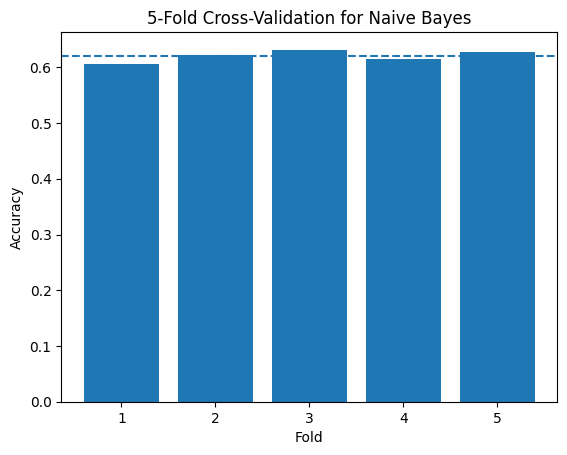

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

naive_bayes_model = GaussianNB()

cross_val_scores = cross_val_score(naive_bayes_model, X, y, cv=5)

average_accuracy = cross_val_scores.mean()
print('Average accuracy:',average_accuracy)

plt.bar(range(1, 6), cross_val_scores)
plt.axhline(y=average_accuracy, linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation for Naive Bayes')
plt.show()

1. Import necessary modules: 'cross_val_score ' from
sklearn model_selection', 'GaussianNB' from
sklearn.naive_bayes', and 'matplotlib-pyplot' as 'plt'.
2. Created a Gaussian Naive Bayes model (naive bayes_model").
3. Used 5-fold cross-validation to compute accuracy scores
( cross_val_scores ') for the Naive Bayes model on the data ('X',
'y').
4. Calculated the average accuracy by computing the mean of the cross-
validation scores.
5. Printed the average accuracy.
6. Created a bar plot of the cross-validation scores with the average
accuracy line.
- X-axis represents folds (1 to 5).
- Y-axis represents accuracy.
- Dashed line represents the average accuracy.
7. Label the plot's axes and give it a title.
8. Displayed the plot using 'pIt.show()'.